In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
file_path = '/Users/merryxmm7/Documents/GitHub/ML_Project_Fashion_Trends/datascience_salaries.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# Perform one-hot encoding for categorical features
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
encoded_cols = pd.get_dummies(df[categorical_cols], drop_first=True)  # Drop the first category to avoid dummy variable trap
df.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([df, encoded_cols], axis=1)

# Split the data into features and target
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Initialize and train KNN Regression model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Function to evaluate models and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

# Function to calculate classification metrics
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

print("Random Forest Regression:")
evaluate_model(rf_reg, X_test, y_test)

print("\nLinear Regression:")
evaluate_model(linear_reg, X_test, y_test)

print("\nKNN Regression:")
evaluate_model(knn_reg, X_test, y_test)


Random Forest Regression:
R2 Score: 0.30
Mean Squared Error: 3407937790.85
Mean Absolute Error: 41279.09

Linear Regression:
R2 Score: -117036624680025504.00
Mean Squared Error: 569449255791584763327807488.00
Mean Absolute Error: 1165349987458.72

KNN Regression:
R2 Score: 0.25
Mean Squared Error: 3650695139.00
Mean Absolute Error: 43377.14


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
file_path = '/Users/merryxmm7/Documents/GitHub/ML_Project_Fashion_Trends/datascience_salaries.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# Perform one-hot encoding for categorical features
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
encoded_cols = pd.get_dummies(df[categorical_cols], drop_first=True)  # Drop the first category to avoid dummy variable trap
df.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([df, encoded_cols], axis=1)

# Split the data into features and target
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Evaluate Random Forest Regression model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

print("Random Forest Regression:")
evaluate_model(rf_reg, X_test, y_test)


Random Forest Regression:
R2 Score: 0.30
Mean Squared Error: 3407937790.85
Mean Absolute Error: 41279.09


In [3]:
#tuning the hyperparameter

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_reg = grid_search.best_estimator_

# Evaluate the best model
print("Random Forest Regression (Tuned):")
evaluate_model(best_rf_reg, X_test, y_test)


Random Forest Regression (Tuned):
R2 Score: 0.32
Mean Squared Error: 3330824368.29
Mean Absolute Error: 40873.15


In [4]:
#further hyperparameter tuning using a wider range of values and see if we can improve the model's performance:


from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialize the random search
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs=-1)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best model
best_rf_reg = random_search.best_estimator_

# Evaluate the best model
print("Random Forest Regression (Randomized Search):")
evaluate_model(best_rf_reg, X_test, y_test)


Random Forest Regression (Randomized Search):
R2 Score: 0.33
Mean Squared Error: 3275191854.47
Mean Absolute Error: 40698.31


In [ ]:
"""# the *: if we want to pass the value parameter, we have to pass it by name
# So its going to be more obvious in the code when we are creating a leaf node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value=None
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_sample_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root=None

    def fit(self, X,y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)

        self.root = self._grow_treee(X,y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y
                                
        #check the stopping criteria
        if(depth>= self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
           leaf_value = self.most_common_label(y)
           
           return Node(value=leaf_value)

        feat_idx = np.random.choice(n_feats, self.n_features, replace=False)
                                 
        #find the best split
        best_feature, best_thresh  = self._best_split(X, y, feat_idx)
        
        #create child nodes
    left_idxs, right_idxs = self._split(X[:,best_feature],best_thresh)
    left = self._grow_tree(X[left_idxs,:], y[left_idxs], depth + 1)
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

    for feat_idx, in feat_idxs:
        X_column = X[:, feat_idx]
        thresholds = np.unique(X_column)
        
        for thr in thresholds:
            #calculate the information gain
            gain = self._information_gain(y, X_column, thr)

            if gain > best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_threshold = thr

    return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        #parent entropy
        parent_entropy = self._entropy(y)

        #chreate children
        left_idx, right_idx = self._split(X_column, threshold)

    if len(left_idxs) == 0 or len(right_idxs) == :
        return 0

        #calculate the weighted  AVG. entropy of children
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = self.entropy(y[left_idxs]), self.entropy(y[right_idxs])
    child_entropy = (n_l/n)*e_l + (n_r/n)* e_r

    #calculate the IG
    information_gain = parent_entropy - child_entropy
    return information_gain


    def _split(self, X_column, split_threshold)
        left_idxs = np.argwhere(X_column <= split_thresh).faltten
        right_idxs= np.argwhere(X_column > split_thresh).faltten
        return left_idxs, right_idxs

    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p*np.log(p) for p in ps if p>0])
    
    def most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value
                       

    def predict():


        """
      



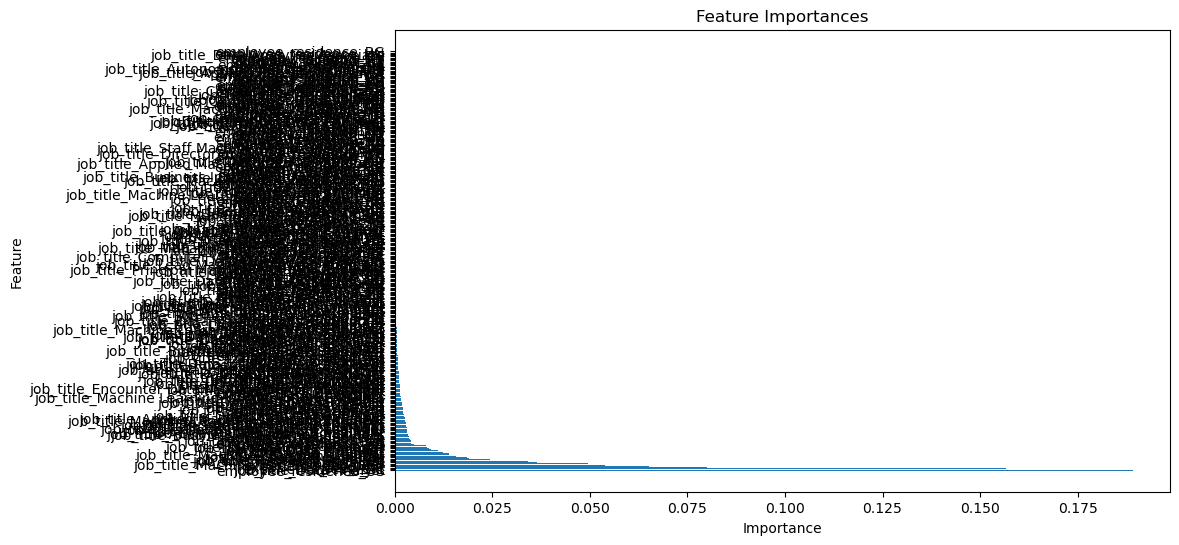

Top 10 Most Important Features:
                   Feature  Importance
245  employee_residence_US     0.18911


In [8]:
import matplotlib.pyplot as plt

# Get feature importances from Random Forest model
feature_importances = rf_reg.feature_importances_

# Create a DataFrame to store feature importances
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(fi_df.head(1))


In [9]:
# Get the most important feature from Random Forest model
best_feature = fi_df.iloc[0]['Feature']
best_importance = fi_df.iloc[0]['Importance']

print(f"The most important feature is '{best_feature}' with importance {best_importance:.4f}")


The most important feature is 'employee_residence_US' with importance 0.1891


In [10]:
# Get the top 3 most important features from Random Forest model
top_3_features = fi_df.head(3)

print("Top 3 Most Important Features:")
print(top_3_features)


Top 3 Most Important Features:
                    Feature  Importance
245   employee_residence_US    0.189110
53   job_title_Data Analyst    0.156712
4       experience_level_SE    0.080011
